# New York City Airbnb Open Data | Airbnb listings and metrics in NYC, NY, USA (2019)
## Airbnb : Wrangling, Analysis, Visualization, Regression, Classification, Hypothesis-Testing


**About Dataset**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

**Content**

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

**Acknowledgements**

This public dataset is part of Airbnb, and the original source can be found on this website.

**Inspiration**

- What can we learn about different hosts and areas?
- What can we learn from predictions? (ex: locations, prices, reviews, etc)
- Which hosts are the busiest and why?
- Is there any noticeable difference of traffic among different areas and what could be the reason for it?

## Importing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
import array
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Siddharth1698/New-York-City-Airbnb-Data-Case-Study/main/AB_NYC_2019.csv')

## Loading the dataset

In [ ]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

## Understanding the dataset

In [ ]:
df.shape

(48895, 16)

## Data Cleaning

In [ ]:
# Understanding the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

*The data is almost 48.8k rows with 16 columns with 3 float types, 7 int types and 6 object types.*

---


In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

*There are around 10k null values in the last_review and review_per_month columns and a very few null values in name and host_name.*

---

In [ ]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

-  From this we can see the mean price to be around 152 dollars.

-  Average availablity of an airbnb around a year is 112 days.

---

In [ ]:
# Insight about unique values
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

*The data have 5 major locations in dataset and only 3 room types available.*

---

In [ ]:
df.duplicated().sum()

0

*We do not have any duplicate rows in our dataset.*

---

## Data Analysis and Visualization

### Host ID

In [ ]:
df.host_id.value_counts().iloc[:5]

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

<Axes: >

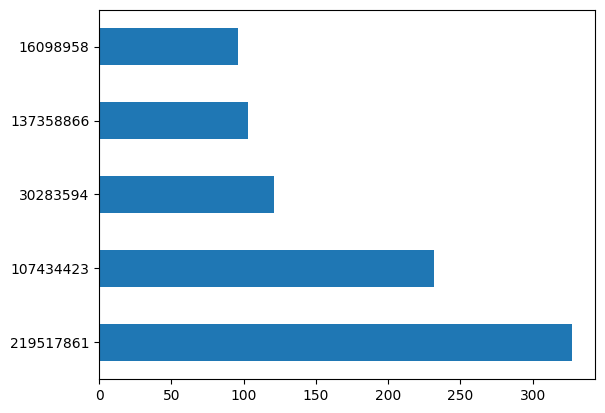

In [ ]:
df.host_id.value_counts().iloc[:5].plot(kind = 'barh')

Highest transaction was done by a customer is **327** in the year 2019.

---









### Room Type

In [ ]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

<Axes: ylabel='room_type'>

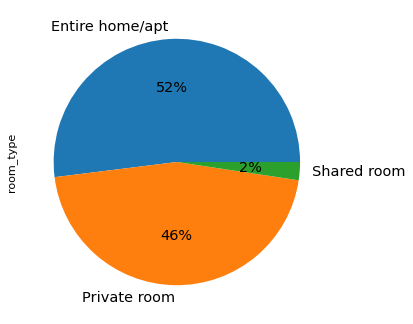

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

In the dataset, around 52% choose to use a house while 46% for a private room. Only 2% people choose a shared room. This could mean more people who use airbnb , use it with family maybe for tours,visits,etc...

### Neighbourhood Groups - Location

In [ ]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<Axes: ylabel='neighbourhood_group'>

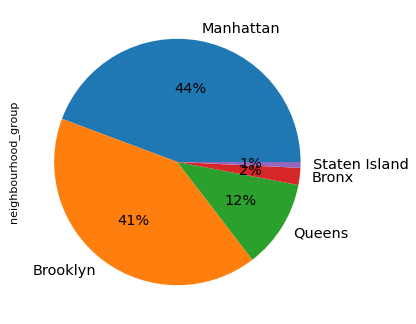

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

* Manhattan is the city where most Airbnb transactions have occured with 44% of entire dataset.
* The least happend in Staten Island only 1%.
* Brooklyn consisted on 41% of transactions with 12% Queens and 2 % in Bronx.





### Neighbourhoods:

In [ ]:
df['neighbourhood'].value_counts().iloc[:5]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

In [ ]:
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

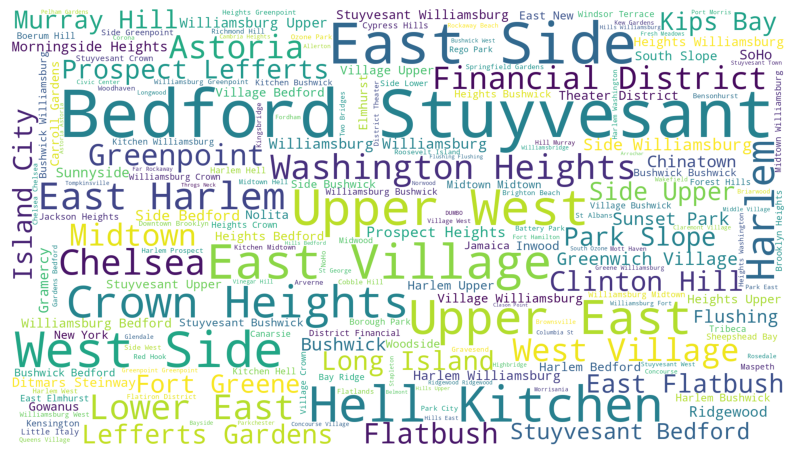

In [ ]:
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white', width=1920,height=1080).generate(" ".join(df.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<Axes: ylabel='neighbourhood'>

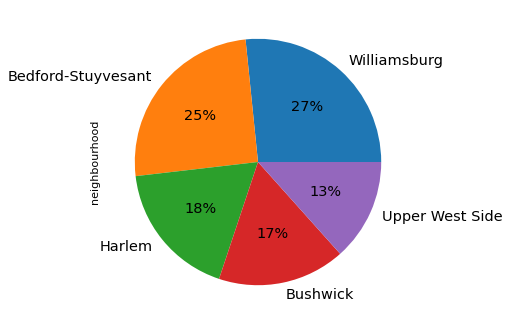

In [ ]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['neighbourhood'].value_counts().iloc[:5].plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

* Williamsburg is the hottest area of transaction followed by Bedford-Stuyvesant.

* This pie-chart showed us the top 5 areas by percentage in the dataset.

### Price:

In [ ]:
df.price.value_counts().iloc[:10]

100    2051
150    2047
50     1534
60     1458
200    1401
75     1370
80     1272
65     1190
70     1170
120    1130
Name: price, dtype: int64

<Axes: >

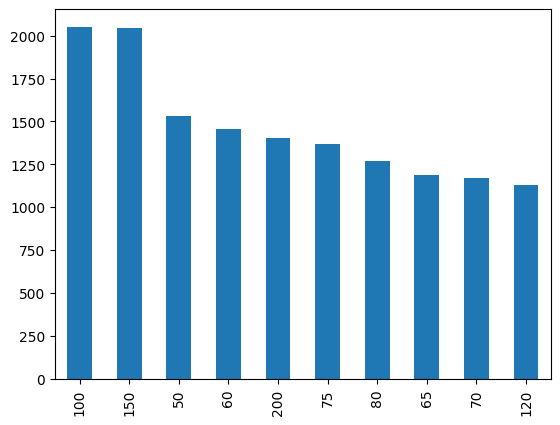

In [ ]:
df.price.value_counts().iloc[:10].plot(kind = 'bar')

* 2k+ airbnb's has a price of 100 dollars and 150 dollars each respectively.
* 1.5k airbnb's have around 50 dollars price.

In [ ]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

- The average pricing is around 152 dollars.

- 50% of data has price greater than 106 dollars.

- The costliest airbnb has around 10k dollars as price.

In [ ]:
df[df['price'] == 10000.000000]

id                                             name   host_id  \
9151    7003697              Furnished room in Astoria apartment  20582832   
17692  13894339  Luxury 1 bedroom apt. -stunning Manhattan views   5143901   
29238  22436899                              1-BR Lincoln Center  72390391   

      host_name neighbourhood_group    neighbourhood  latitude  longitude  \
9151   Kathrine              Queens          Astoria  40.76810  -73.91651   
17692      Erin            Brooklyn       Greenpoint  40.73260  -73.95739   
29238    Jelena           Manhattan  Upper West Side  40.77213  -73.98665   

             room_type  price  minimum_nights  number_of_reviews last_review  \
9151      Private room  10000             100                  2  2016-02-13   
17692  Entire home/apt  10000               5                  5  2017-07-27   
29238  Entire home/apt  10000              30                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
9151                0.04                               1                 0  
17692               0.16                               1                 0  
29238                NaN                               1                83

The data have 3 airbnbs with 10k per night luxury stay, one private room and 2 home stay.

### Minimum Nights

In [ ]:
df['minimum_nights'].value_counts()

1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64

In [ ]:
for i in range(0,10):
  print("Number of nights: ",i)
  print("Amount of trasactions:",len(df[df['minimum_nights'] == i]))

Number of nights:  0
Amount of trasactions: 0
Number of nights:  1
Amount of trasactions: 12720
Number of nights:  2
Amount of trasactions: 11696
Number of nights:  3
Amount of trasactions: 7999
Number of nights:  4
Amount of trasactions: 3303
Number of nights:  5
Amount of trasactions: 3034
Number of nights:  6
Amount of trasactions: 752
Number of nights:  7
Amount of trasactions: 2058
Number of nights:  8
Amount of trasactions: 130
Number of nights:  9
Amount of trasactions: 80


<Axes: >

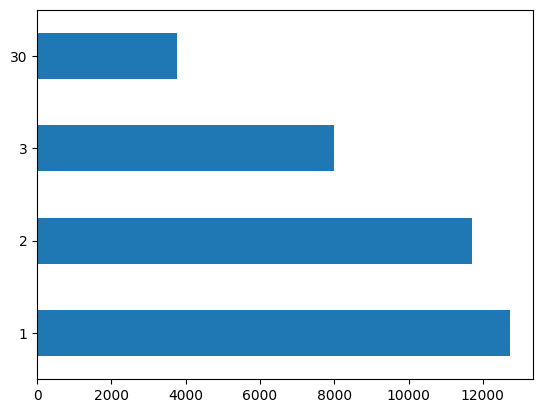

In [ ]:
df['minimum_nights'].value_counts().iloc[:4].plot(kind = 'barh')

- We can observe that most of almost 12k people used 1 night stay in airbnb.

- 11k people choose 2 night stay while 7k choose 3 night stay.

- Almost 3.7k stayed upto a month.

### Number of reviews

In [ ]:
df['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: number_of_reviews, Length: 394, dtype: int64

- 10k airbnbs dont have any reviews.
- 5.2k has around 1 review

### Reviews per month

In [ ]:
df[df['reviews_per_month'] > 1].reviews_per_month.value_counts().sum()

15908

15.9k reviews were above 1.


In [ ]:
df[df['reviews_per_month'] > 1]['reviews_per_month'].value_counts().iloc[:5]

2.00    406
3.00    222
4.00    130
1.15     90
1.05     88
Name: reviews_per_month, dtype: int64

Above 1, around 406 airbnbs have 2 reviews per month, 222 with 3 and 130 with 4.



In [ ]:
df['reviews_per_month'].max()

58.5

In [ ]:
df[df['reviews_per_month'] == 58.5]

id                                               name    host_id  \
42075  32678719  Enjoy great views of the City in our Deluxe Room!  244361589   

      host_name neighbourhood_group     neighbourhood  latitude  longitude  \
42075   Row NYC           Manhattan  Theater District  40.75918  -73.98801   

          room_type  price  minimum_nights  number_of_reviews last_review  \
42075  Private room    100               1                156  2019-07-07   

       reviews_per_month  calculated_host_listings_count  availability_365  
42075               58.5                               9               299

### Calculate host listing

In [ ]:
df.calculated_host_listings_count.value_counts().iloc[:5]

1    32303
2     6658
3     2853
4     1440
5      845
Name: calculated_host_listings_count, dtype: int64

<Axes: >

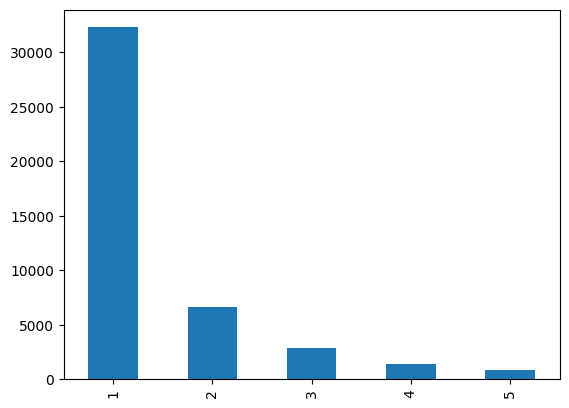

In [ ]:
df.calculated_host_listings_count.value_counts().iloc[:5].plot(kind = 'bar')

Most hosts used the listings only once that is around 32.3k and 6.6k around 2 times.


In [ ]:
df.calculated_host_listings_count.describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64


On an average, a host has used listings 7 times.

Maximum times being 327.

### Bivariate Analysis

<ipython-input-35-d62f688ebc64>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

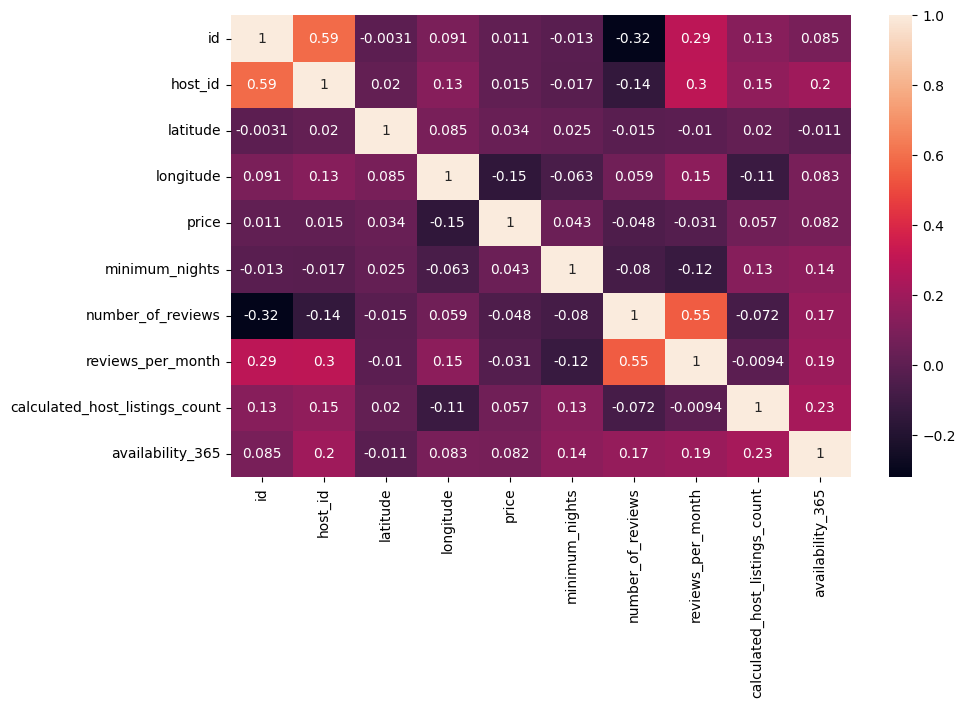

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

### Maps - Scatterplots

#### Latitude and Longitude with loaction

In [ ]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

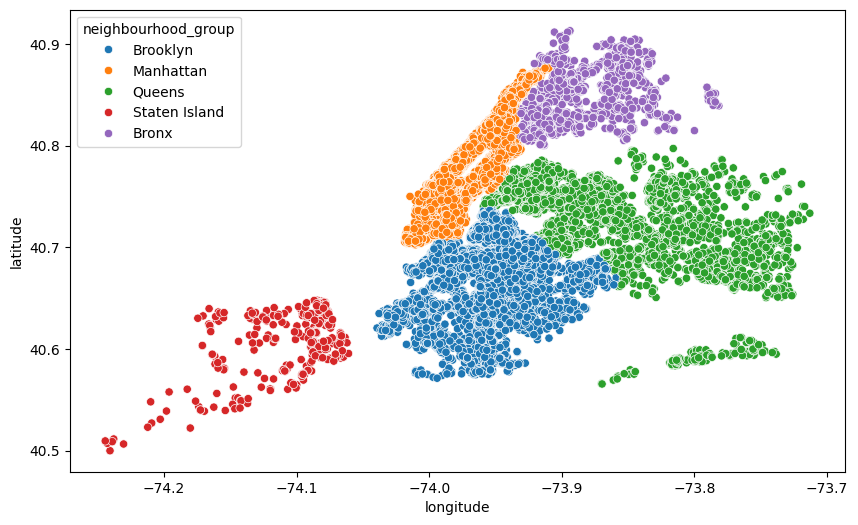

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group')
plt.show()

This shows us the dataset distribution in NewYork city with respect to latitude and longitude.

#### Latitude and Longitude with room type

In [ ]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

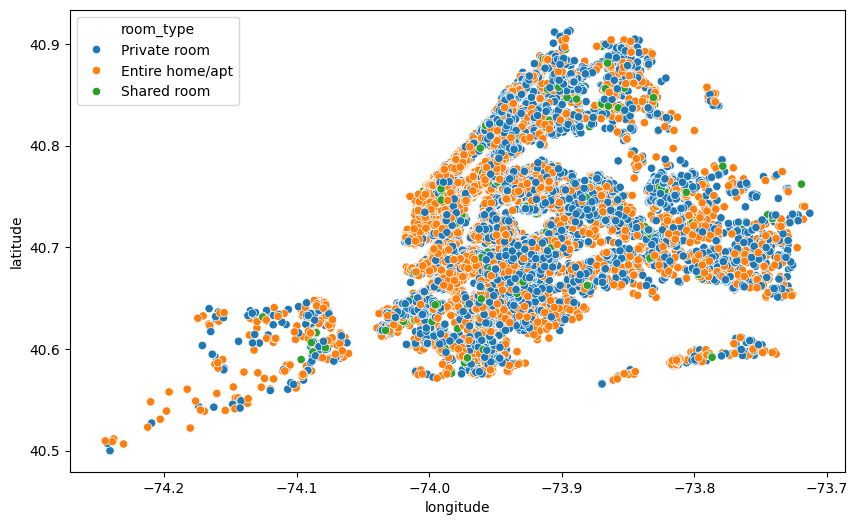

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type')
plt.show()

#### Latitude and Longitude with room availablity for 365 days

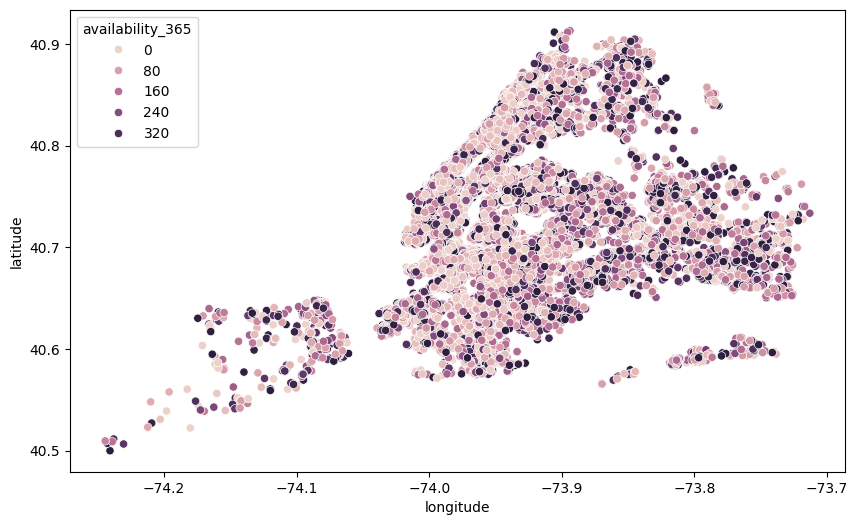

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='availability_365')
plt.show()

### Plots

<Axes: xlabel='room_type', ylabel='count'>

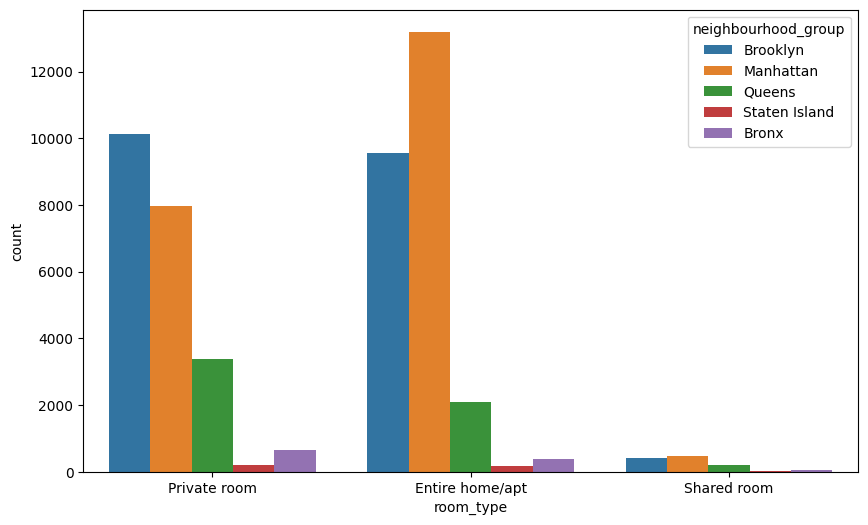

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'room_type', hue = 'neighbourhood_group')

- Home service seems to be most used by people and the highest in Manhattan.
- This is also the highest service used across New York City.
- In Brooklyn, Private rooms were more used.

---

<ipython-input-42-65de2d259f61>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')


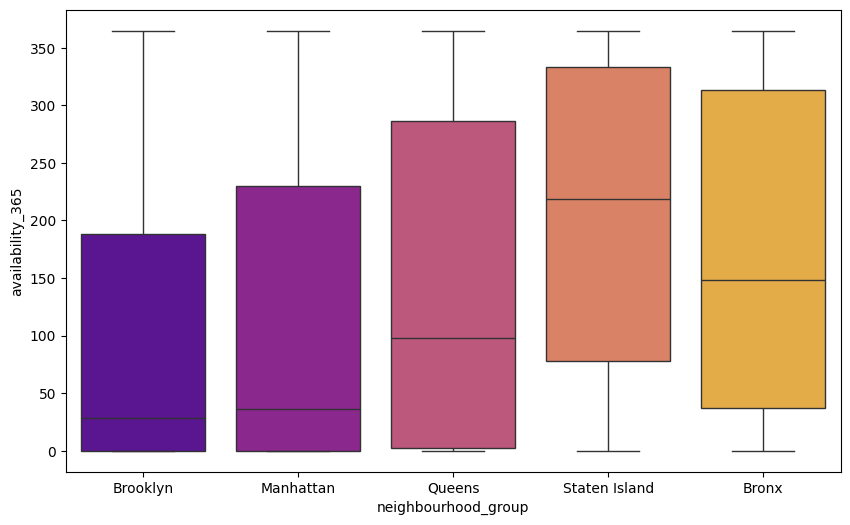

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')

*Staten Island has th highest average airbnb availablity.*

In [ ]:
df['neighbourhood'].value_counts().iloc[:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

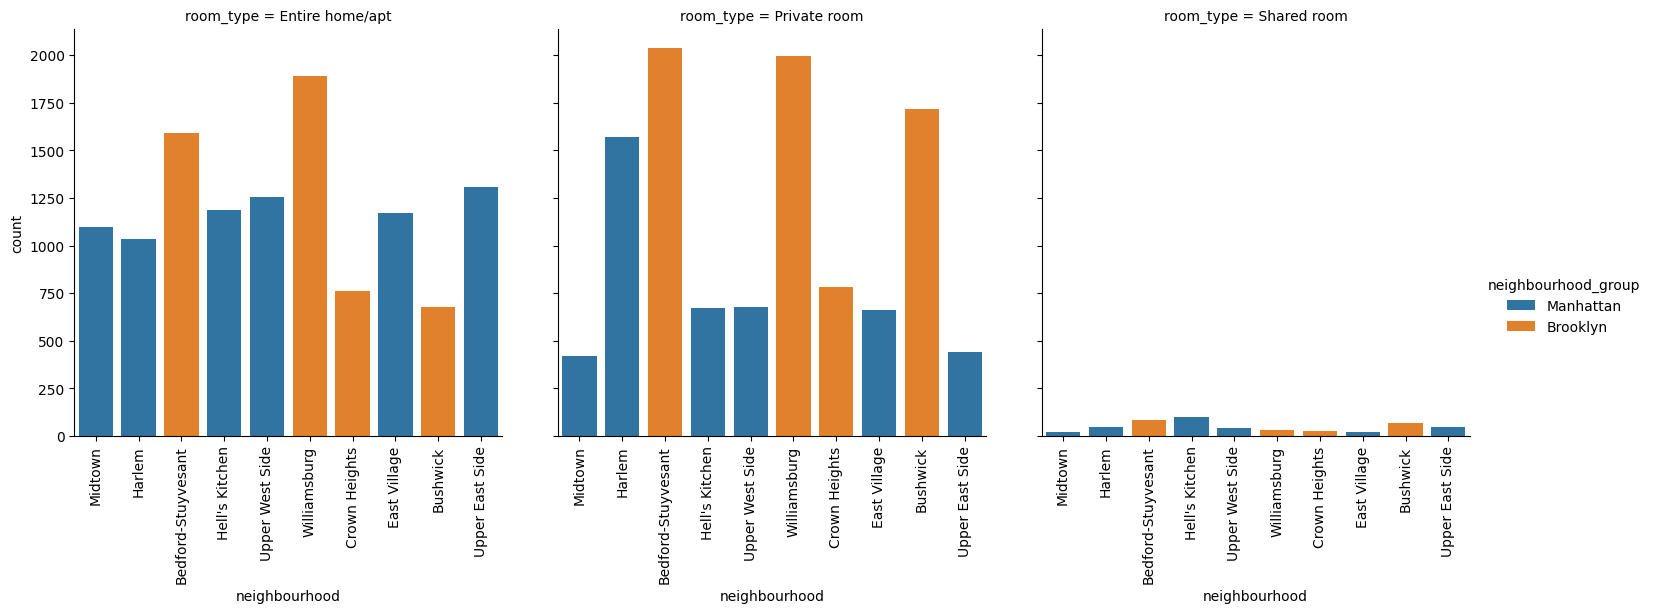

In [ ]:
neighb =df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
pl =sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=neighb, kind='count')
pl.set_xticklabels(rotation=90)

<Axes: >

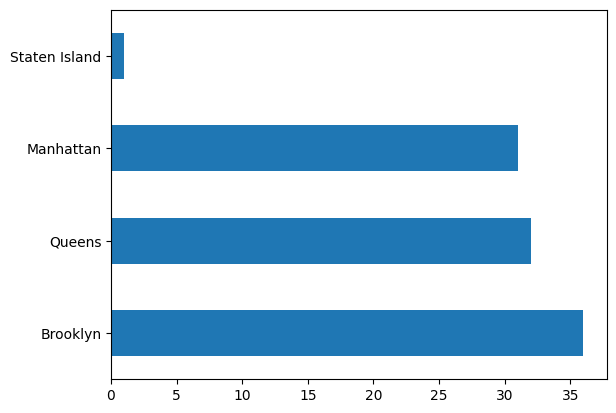

In [ ]:
# Rooms with top 100 reviews by neighbourhood
dfr=df.sort_values(by=['number_of_reviews'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot(kind = 'barh')

In top 100 airbnb's with number of reviews, Brooklyn has highest reviews followed by Queens and then Manhattan. And Staten Island have the lowest.

<Axes: >

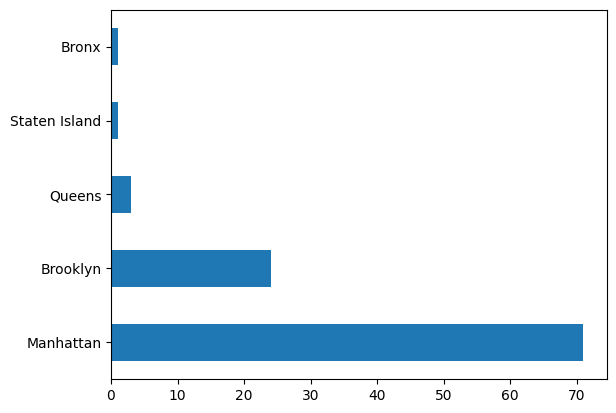

In [ ]:
# Rooms with top 100 expensive by neighbourhood
dfr=df.sort_values(by=['price'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot(kind = 'barh')


In top 100 airbnbs then almost 70+ comes in Manhattan, followed by 25 in Brooklyn.

<Axes: >

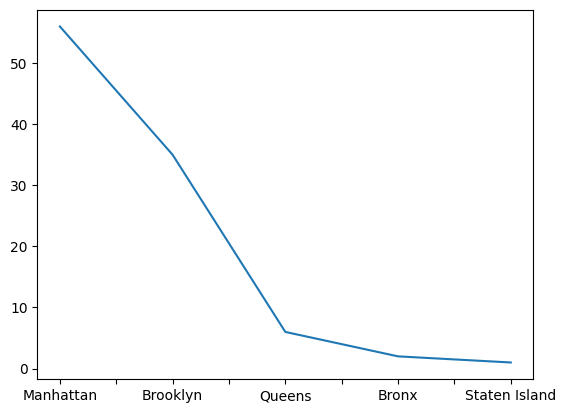

In [ ]:
# Rooms with top 100 minimum_nights  by neighbourhood
dfr=df.sort_values(by=['minimum_nights'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot()

Manhattan has highest airbnbs with highest minimum nights.

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

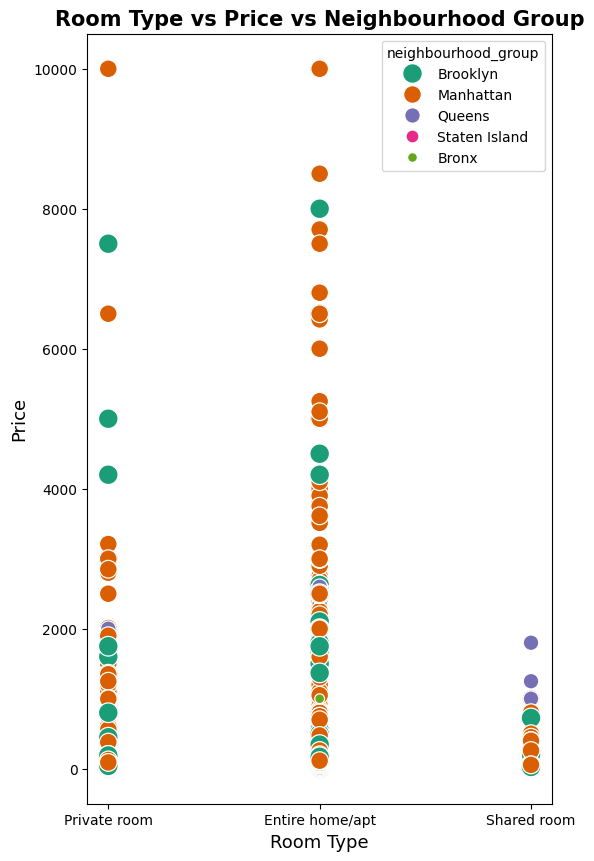

In [ ]:
plt.figure(figsize=(6,10))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

**We dont require host_id,name,id,host_name and last_review as these do not any way effect for further analysis or pre-processing. So we can drop them.**

In [ ]:
df.drop(['host_id','name','latitude','longitude','id','host_name','last_review'], axis=1, inplace=True)
df.head()

neighbourhood_group neighbourhood        room_type  price  minimum_nights  \
0            Brooklyn    Kensington     Private room    149               1   
1           Manhattan       Midtown  Entire home/apt    225               1   
2           Manhattan        Harlem     Private room    150               3   
3            Brooklyn  Clinton Hill  Entire home/apt     89               1   
4           Manhattan   East Harlem  Entire home/apt     80              10   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9               0.21                               6   
1                 45               0.38                               2   
2                  0                NaN                               1   
3                270               4.64                               1   
4                  9               0.10                               1   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0

In [ ]:
df.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df['reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

I will be filling all the rows of column of reviews_per_month as 0 where its null value, this is because the data is null only because no one has reviewd it and hence the number of review is 0 here.

In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
# Missing value implies there are no reviews for the location.

In [ ]:
df.isna().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Hypothesis Testing

Taking  dataset where we have room types as homes and non-homes and their total availablity.

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.loc[df_copy['room_type'] == 'Entire home/apt', 'home'] = True
df_copy.loc[df_copy['room_type'] != 'Entire home/apt', 'home'] = False


In [ ]:
df_hyp = df_copy[['home','availability_365']]
df_hyp.head()

home  availability_365
0  False               365
1   True               355
2  False               365
3   True               194
4   True                 0

In [ ]:
df_hyp.groupby('home').count()

availability_365
home                   
False             23486
True              25409

Almost 23k airbnb's are non-homes that is a private room or shared room while 25k of them are homes.

In [ ]:
home = df_hyp['availability_365'][df_hyp['home']==True]
non_home = df_hyp['availability_365'][df_hyp['home']==False]

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

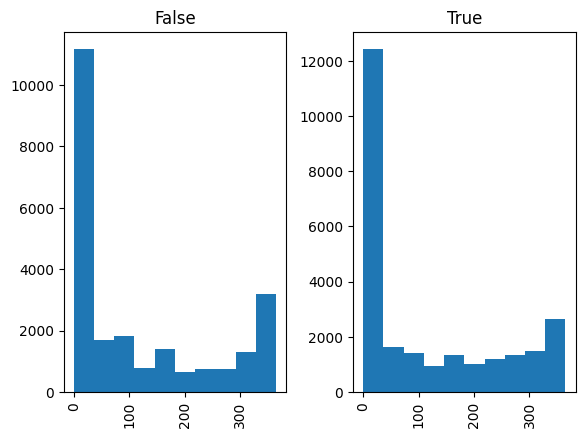

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df_hyp.hist(by ='home')

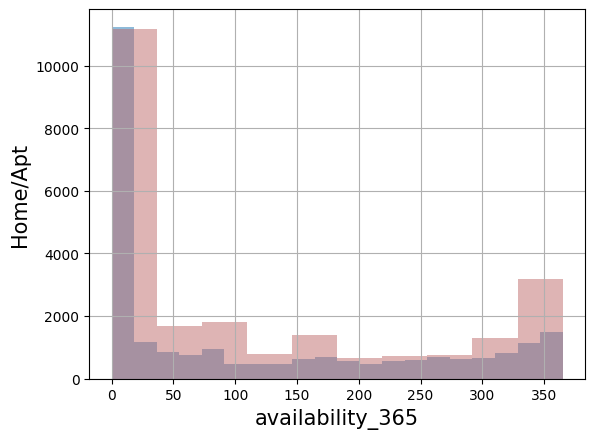

In [ ]:
import seaborn as sns
home.hist(histtype='stepfilled', alpha=.5, bins=20)     # default number of bins = 10
non_home.hist(histtype='stepfilled', alpha=.5,color=sns.desaturate("indianred", 0.75 ), bins=10)
plt.xlabel('availability_365',fontsize=15)
plt.ylabel('Home/Apt',fontsize=15)
plt.show()


On an average the non-homes were more as compared to that of homes data.

#### Hypothesis:

Null hypothsis : Availablity has no influence over airbnb being home or non-home.

Alternate : Availablity has an influence over airbnb being home or non-home.

#### Test Statics
Using the mean availablity difference of homes and non-homes.

In [ ]:
means_table =df_hyp.groupby('home').mean()
means_table

availability_365
home                   
False        113.712850
True         111.920304

On an average non homes availablity is more in a year than homes.

In [ ]:
observatied_diff = means_table['availability_365'][1] - means_table['availability_365'][0]
observatied_diff

-1.7925463792831238

#### Predicting the Statistic under null hypothesis
Simulating the null hypothesis under permuation


In [ ]:
shuffled = df_hyp.sample(len(df_hyp),replace = False)
shuffled

home  availability_365
2671   False                14
30344  False               171
25138   True               179
9870   False                 0
16834  False                 0
...      ...               ...
28132   True                 5
36483   True                28
25446   True                82
2065    True                42
4349   False                89

[48895 rows x 2 columns]

In [ ]:
shuffled_availablity = shuffled['availability_365']
type(shuffled_availablity)

pandas.core.series.Series

In [ ]:
orig_and_shuff = df_hyp.assign(shuffled_availablity = shuffled_availablity.values)
orig_and_shuff

home  availability_365  shuffled_availablity
0      False               365                    14
1       True               355                   171
2      False               365                   179
3       True               194                     0
4       True                 0                     0
...      ...               ...                   ...
48890  False                 9                     5
48891  False                36                    28
48892   True                27                    82
48893  False                 2                    42
48894  False                23                    89

[48895 rows x 3 columns]

In [ ]:
all_group_means = orig_and_shuff.groupby('home').mean()
all_group_means

availability_365  shuffled_availablity
home                                         
False        113.712850            113.564805
True         111.920304            112.057145

In [ ]:
difference = all_group_means['shuffled_availablity'][0]- all_group_means['shuffled_availablity'][1]
difference

1.5076594583565708

In [ ]:
observatied_diff

-1.7925463792831238

#### One simulation

In [ ]:
shuffled = df_hyp.sample(len(df_hyp),replace = False)
shuffled_availablity = shuffled['availability_365']
orig_and_shuff = df_hyp.assign(shuffled_availablity = shuffled_availablity.values)
all_group_means = orig_and_shuff.groupby('home').mean()
differences = abs(all_group_means['shuffled_availablity'][0] - all_group_means['shuffled_availablity'][1])

In [ ]:
differences

0.41882934843627595

#### Permutation test
Simulating for many times and collecting the differences in an array

In [ ]:


differences = np.zeros(5000)

In [ ]:
for i in range(5000):
    shuffled = df_hyp.sample(len(df_hyp),replace = False)
    shuffled_availablity = shuffled['availability_365']
    orig_and_shuffled = df_hyp.assign(shuffled_availablity = shuffled_availablity.values)
    all_group_means = orig_and_shuffled.groupby('home').mean()
    difference = (all_group_means['shuffled_availablity'][0] - all_group_means['shuffled_availablity'][1])
    differences[i] = difference


In [ ]:
differnces_df = pd.DataFrame(differences)
differnces_df

0
0     1.019984
1    -0.818384
2     0.446769
3    -1.420686
4    -0.590688
...        ...
4995  1.393115
4996 -0.674425
4997 -0.550130
4998 -2.085586
4999 -0.798556

[5000 rows x 1 columns]

In [ ]:
import matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')

-1.7925463792831238


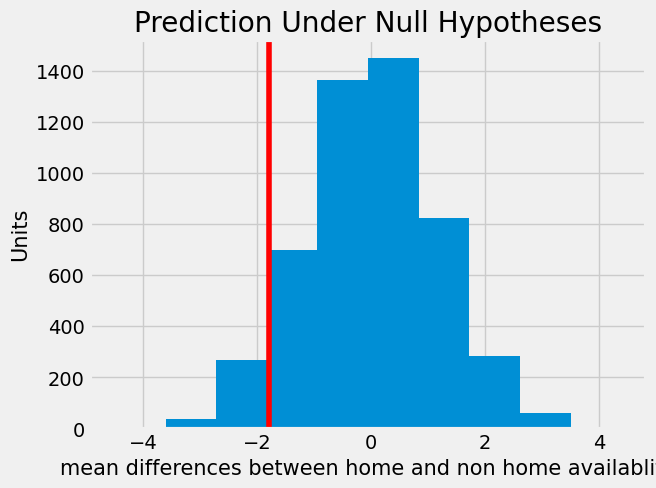

In [ ]:
differnces_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('mean differences between home and non home availablity',fontsize=15)
plt.ylabel('Units',fontsize=15);
plt.axvline(observatied_diff, color='red');
print(observatied_diff)

In [ ]:
np.count_nonzero(differences <= observatied_diff)/differences.size

0.0654

The empirical P-value is nearly 0, meaning that none of the 5,000 observed samples resulted in a difference of -1.79 or lower. This is an approximation; the exact chance of getting a difference in that range is not 0 but it is vanishingly small.
#### Therefore, we reject the null hypothesis and go for alternate hypothesis. Therefore, Availablity do have an influence on airbnb being home or non-home.

## T-Test (Students T-Test)

Here, i performed t-test to check wheather the availablity of airbnb when taken a sample would change majorly with that of the overall average avaialblity of all airbnbs for airbnb's which are available for atleast more than a month.

Null hypothsis : Average availablity of Airbnbs would be same even if we take a sample of availablity data.

Alternate : Average availablity of Airbnbs would be different if we take a sample of availablity data.

In [ ]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 8,8
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [ ]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    ax.set_xlim([30, 365])
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=3)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

A function to carry out plotting for distributions.

In [ ]:
df_copy.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'home'],
      dtype='object')

We are intrested to get the data of airbnb's available over a month.

In [ ]:
df_hyp = df_copy[['neighbourhood_group','availability_365']]
df_hyp = df_hyp[df_hyp['availability_365'] > 30]
df_hyp.head()

neighbourhood_group  availability_365
0            Brooklyn               365
1           Manhattan               355
2           Manhattan               365
3            Brooklyn               194
5           Manhattan               129

We can visualize the distribution with its mean value for entire dataframe.

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

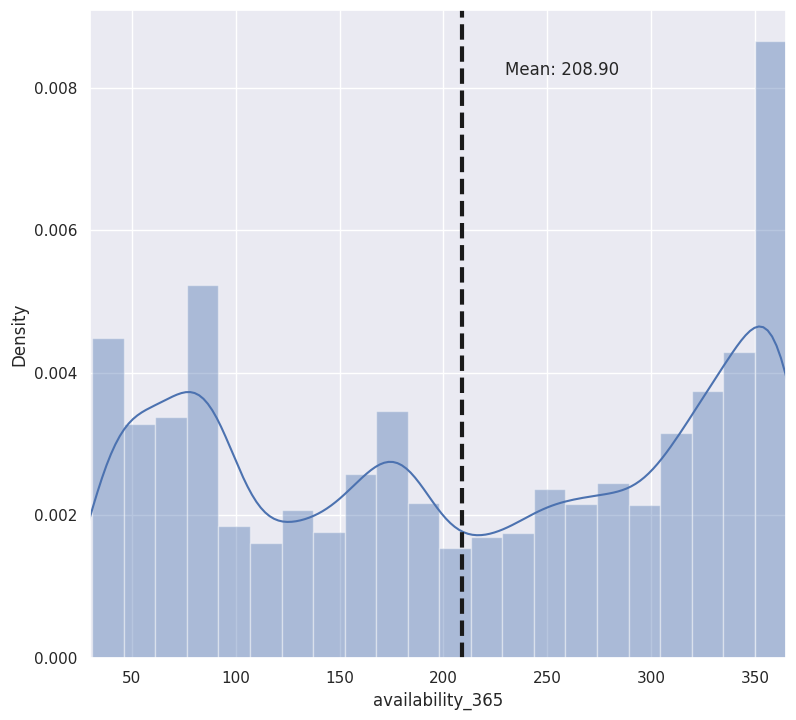

In [ ]:
plot_distribution(df_hyp['availability_365'])

I have taken a large sample of data as my data is not normal taking small sample size for t-test would be invalid.

In [ ]:
sample_size = 2000
avail_sample=np.random.choice(df_hyp['availability_365'],sample_size)
avail_sample

array([342, 127,  85, ...,  91,  39, 297])

In [ ]:
np.mean(avail_sample)

210.0335

We can visualize the distribution with its mean value for sample dataframe.

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

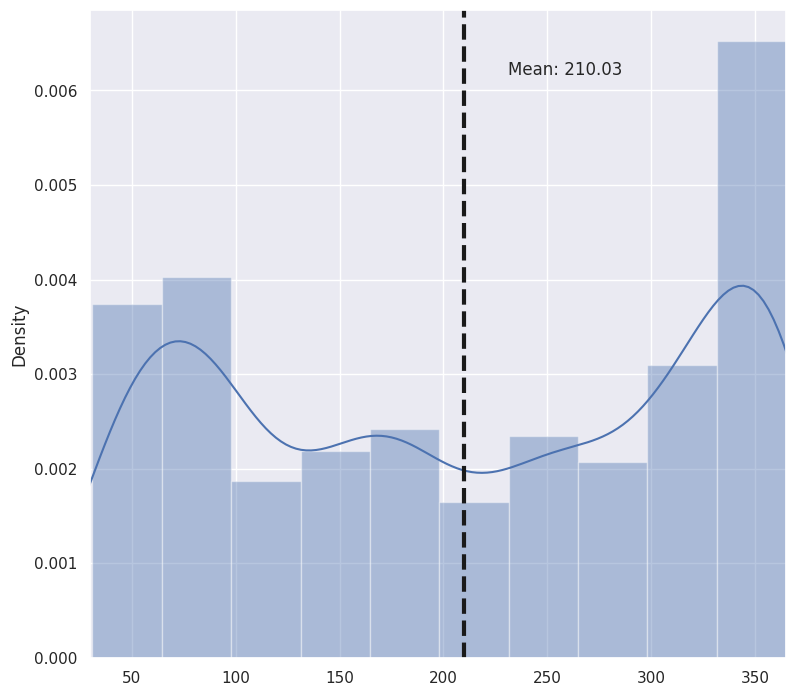

In [ ]:
plot_distribution(avail_sample)

Now we can take both homes and non-homes and plot and overlay to get the mean of each on graph.

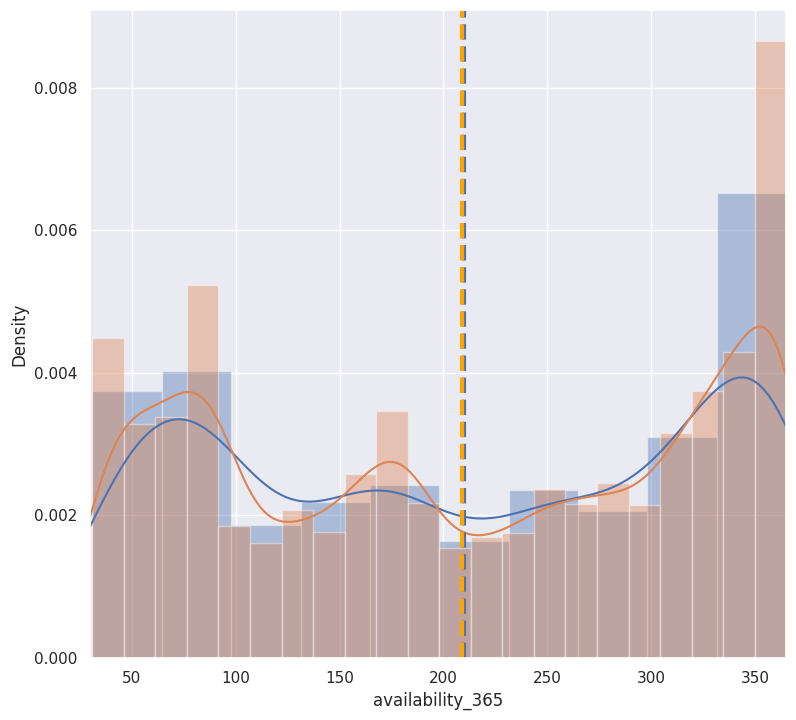

In [ ]:
plt.figure()
ax1 = sns.distplot(avail_sample)
ax2 = sns.distplot(df_hyp['availability_365'])
ax1.set_xlim([30, 365])
ax2.set_xlim([30, 365])
plt.axvline(np.mean(avail_sample), color='b', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(df_hyp['availability_365']), color='orange', linestyle='dashed', linewidth=3)

I have use Scipy library to import ttest_ind which helps us to carry out the t-test and give us the p-value.

In [ ]:
def compare_2_groups(arr_1, arr_2, alpha):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions hence we fail to reject H0(Null Hypothesis)')
    else:
        print('Different distributions hence we reject H0(Null Hypothesis)')

compare_2_groups(df_hyp['availability_365'], avail_sample, 0.05)

Statistics=-0.436, p=0.663
Same distributions hence we fail to reject H0(Null Hypothesis)


#### Here we fail to reject H0 and hence we accept the null hypothesis itself that the average availablity of Airbnbs would be same even if we take a sample of availablity data.

## Encoding Data and Outlier removal.

We can first see the box plot of the price and find some outliers and remove them so that we can do better in further steps.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Siddharth1698/New-York-City-Airbnb-Data-Case-Study/main/AB_NYC_2019.csv')

fig = px.box(df, y="price")
fig.update_layout(
    autosize=False,
    width=500,
    height=400
)
fig.show()

Here, we can see that there are a lot of outliers taking up the data, it could be expensive Airbnbs, but there are a very few of them compared to data and it overall has a huge impact and must be removed.

<Axes: >

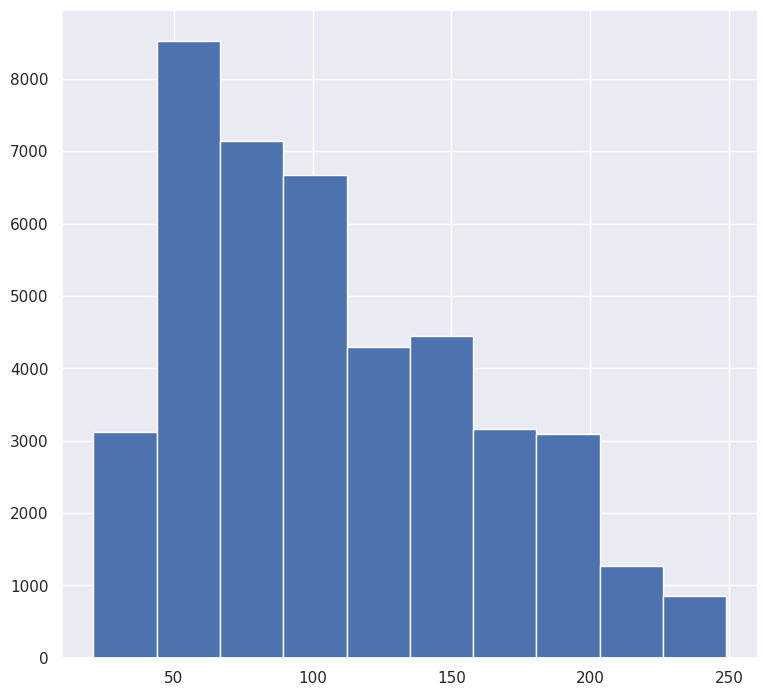

In [ ]:
dfp = df["price"][df["price"] < 250]
dfp[dfp > 20].hist()


After experimenting around values the range of (20,250) has a good gaussian wise distribution and hence we can go ahead with data in this range and remove others as outliers.

In [ ]:
df=df[df["price"]<250]
df=df[df["price"]>20]
df['room_type'].value_counts()

Private room       21722
Entire home/apt    19770
Shared room         1090
Name: room_type, dtype: int64

In [ ]:
fig = px.box(df, y="price")
fig

This is the final price data on which we are performing the rest of operations.

In [ ]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.drop(['id','host_id','latitude','longitude','host_name','last_review','name'], axis = 1,inplace=True)
df = pd.get_dummies(df, columns=['neighbourhood_group',"room_type"], prefix = ['ng',"rt"],drop_first=True)
df.drop(["neighbourhood"], axis=1, inplace=True)
df.head()

price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0               0.00   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  ng_Brooklyn  \
0                               6               365            1   
1                               2               355            0   
2                               1               365            0   
3                               1               194            1   
4                               1                 0            0   

   ng_Manhattan  ng_Queens  ng_Staten Island  rt_Private room  rt_Shared room  
0             0          0                 0                1               0  
1             1          0                 0                0               0  
2             1          0                 0                1               0  
3             0          0                 0                0               0  
4             1          0                 0                0               0

We performed an Encoding on neighbourhood and room type and removed some unwanted columns.

## Linear Regression

In [ ]:
def linear(x,z):
  global X,y,predictions,residue
  X = df_reg[x].values.reshape(-1,1)
  y = df_reg[z].values.reshape(-1,1)


  #3 Feature Scaling
  from sklearn.preprocessing import StandardScaler
  sc_X = StandardScaler()
  sc_y = StandardScaler()

  X = sc_X.fit_transform(X)
  y = sc_X.fit_transform(y)

  from sklearn.linear_model import LinearRegression
  reg = LinearRegression()
  reg.fit(X, y)

  print("The linear model is: Y = {:.2} + {:.2}X".format(reg.intercept_[0], reg.coef_[0][0]))

  print("Regression Intercept : ",reg.intercept_[0])


  predictions = reg.predict(X)
  rms = mean_squared_error(y, predictions, squared=False)

  fig = px.scatter(
    df_reg, x=x, y=z, opacity=0.65,
    trendline='ols', trendline_color_override='darkblue')
  fig.show()

  # Plot the residuals after fitting a linear model
  sns.residplot(x=X, y=y, lowess=True, color="g")

  print("RMSE is: ", rms)
  x2 = sm.add_constant(X)

  est = sm.OLS(y, x2)
  #OLS is Ordinary Least Squares

  #est.TAB
  est2 = est.fit()
  print(est2.summary())

  residue = y - predictions

I defined a function here that will help us automatically do the regression and show the plot and OLS results.

Here i got intrested to know how the regresion line performs as early during wrangling i found number of reviews and reviews per month to be correlated with an coeffecient of 0.5. I have specfically taken a range of data for my regression purpose for better visualization. That is num of reviews less than 400 and reviews per month less than 15.

In [ ]:
df_reg = df[['number_of_reviews','reviews_per_month']]
df_reg = df_reg[df_reg['number_of_reviews']<400]
df_reg = df_reg[df_reg['reviews_per_month']<15]
df_reg

number_of_reviews  reviews_per_month
0                      9               0.21
1                     45               0.38
2                      0               0.00
3                    270               4.64
4                      9               0.10
...                  ...                ...
48890                  0               0.00
48891                  0               0.00
48892                  0               0.00
48893                  0               0.00
48894                  0               0.00

[42536 rows x 2 columns]

Here we are plotting thr linear model for this simple linear regression. We can analyze the model and get the regression Intercept.

Also i have plotted the residue plot at the end so that we can see how the difference between actual value and prediction is.

The linear model is: Y = 1.1e-16 + 0.6X
Regression Intercept :  1.1487249339260773e-16


RMSE is:  0.8007634689812883
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                 2.380e+04
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:17:09   Log-Likelihood:                -50905.
No. Observations:               42536   AIC:                         1.018e+05
Df Residuals:                   42534   BIC:                         1.018e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.545e-16  

number_of_reviews  reviews_per_month  Predictions   Residue
0                9.0               0.21    -0.204685 -0.370260
1               45.0               0.38     0.285444 -0.751599
2                0.0               0.00    -0.327217 -0.382115
3              270.0               4.64     3.348749 -1.088766
4                9.0               0.10    -0.204685 -0.440653

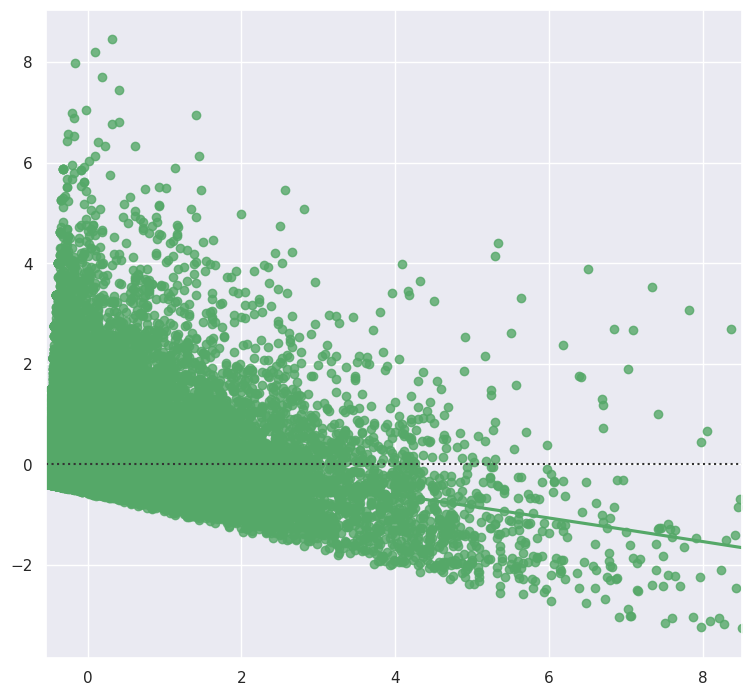

In [ ]:
linear('number_of_reviews','reviews_per_month')
df_n = pd.DataFrame(predictions, columns = ['Predictions'])
df_reg_new = pd.concat([df_reg,df_n],axis = 1)
df_n = pd.DataFrame(residue, columns = ['Residue'])
df_reg_new = pd.concat([df_reg_new,df_n],axis = 1)
df_reg_new[['number_of_reviews','reviews_per_month','Predictions','Residue']].head()

We can from here interpret the fact that R2 is almost 0.35 which means the model is considered weak in nature and not particularly weak. We have also got our RMSE around 0.8 which is fine to an extent.

## Multiple Linear Regression

Here we are intrested to predict the prices of Airbnb's with help of all other variables assosiated with it.

In [ ]:
df.head()

price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0               0.00   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365  ng_Brooklyn  \
0                               6               365            1   
1                               2               355            0   
2                               1               365            0   
3                               1               194            1   
4                               1                 0            0   

   ng_Manhattan  ng_Queens  ng_Staten Island  rt_Private room  rt_Shared room  
0             0          0                 0                1               0  
1             1          0                 0                0               0  
2             1          0                 0                1               0  
3             0          0                 0                0               0  
4             1          0                 0                0               0

In [ ]:
df.shape

(42582, 12)

I am taking the price as 'y' and the rest of columns as 'X'. Here we can see that the data are all of different scales and hence we use the help of StandardScaler to scale them and we can procced with out splitting.

In [ ]:
X = df.drop(['price'],axis=1)
y = df['price'].values.reshape(-1,1)


sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_X.fit_transform(y)


I used 30% of the data for testing and fitting it to the linear model which we generated using the rest off the data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29807, 11)
(29807, 1)
(12775, 11)
(12775, 1)


This is our linear model and we can see the intercept and coefficents at the end.

In [ ]:



# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# print the intercept and coefficients
print("intercept is: ",linreg.intercept_)

print("coefficients are: ",linreg.coef_)

intercept is:  [-0.00065527]
coefficients are:  [[-0.06012777 -0.00322637 -0.02921139  0.05312798  0.09180824  0.15880011
   0.37331764  0.04477949 -0.00667876 -0.60179669 -0.25548752]]


In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:

print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.49825062463278325


mean_absolute_error : 0.5447704306017557


mean_squared_error :  0.4979601463281744


root_mean_squared_error :  0.7056629126772743


We can from here interpret the fact that R2 is almost 0.5 which means the model is moderate in nature and not particularly weak. We have also got our RMSE around 0.7 which is fine.

Next, we go for a 10 fold cross validation on our Linear model.

In [ ]:

my_pipeline = Pipeline(steps=[('model', LinearRegression())])

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* scores
scores1 =  1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='r2')
scores2 = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='neg_mean_absolute_error')
scores3 = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='neg_root_mean_squared_error')

print("R squared scores:\n", scores1)
print("Average R squared score (across experiments):",scores1.mean())


print("RMSE scores:\n", scores3)
print("Average RMSE score (across experiments):",scores3.mean())

R squared scores:
 [0.40285593 0.43615142 0.4762851  0.51862289 0.46868858 0.4777346
 0.4933936  0.47629253 0.54692744 0.53290862]
Average R squared score (across experiments): 0.4829860705352534
RMSE scores:
 [0.75009141 0.7151905  0.71130755 0.69458738 0.70942643 0.69992466
 0.69973819 0.71329621 0.72334227 0.72276634]
Average RMSE score (across experiments): 0.7139670947693814


We can see that the average R square came around 0.48 and RMSE around 0.71.

In [ ]:
x2 = sm.add_constant(X)
est = sm.OLS(y, x2)
#OLS is Ordinary Least Squares
#est.TAB
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     3777.
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:17:12   Log-Likelihood:                -45920.
No. Observations:               42582   AIC:                         9.186e+04
Df Residuals:                   42570   BIC:                         9.197e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.07e-16      0.003   1.47e-13      1.0

## Classification

In [ ]:
df_classif = df

In [ ]:
df_classif['availability_365'] = df_classif['availability_365'].apply(lambda x: 1 if x == 365 else 0)

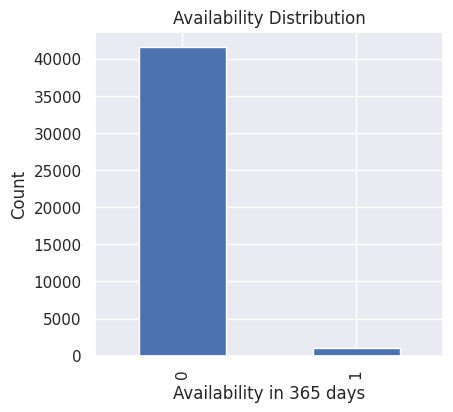

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
df_classif['availability_365'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Availability in 365 days')
plt.ylabel('Count')
plt.title('Availability Distribution')
plt.show()

In [ ]:
X = df_classif.drop(['availability_365'],axis=1)
y = df_classif['availability_365'].values

Went for oversampling as we can see a huge imbalance in data, so we would end up with very low AUC score. Oversampling seem to work better than undersampling in this case.

In [ ]:
from imblearn.over_sampling import SMOTE
import imblearn
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

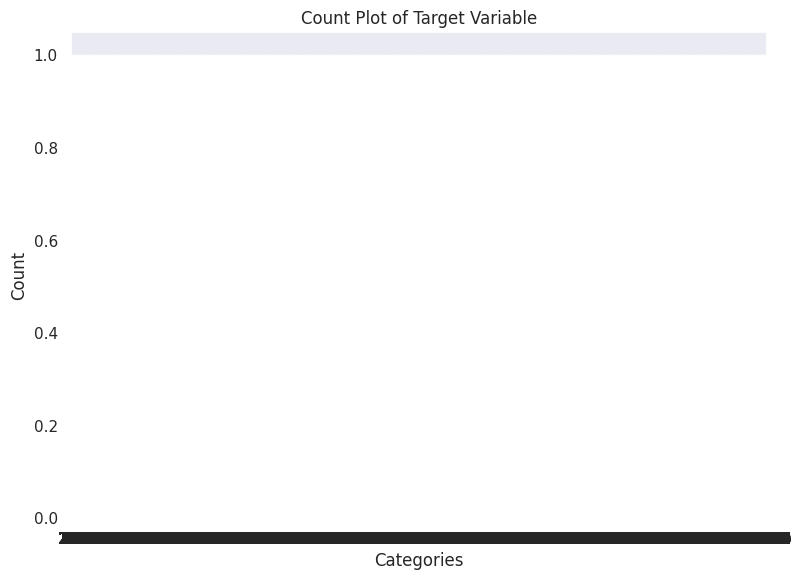

In [ ]:
# Assuming y is properly formatted
plt.figure(figsize=(8, 6))
sns.countplot(y)
plt.title('Count Plot of Target Variable')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

In [ ]:
len(y)

83156

Defining a functiom to perform classification plotting of confusion matrix.

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Used for classification of dataset.
def classif_results():
  conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
  print('Confusion matrix:\n', conf_mat)

  labels = ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  print("Accuracy", metrics.accuracy_score(y_test, y_pred))

  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))


  auc = roc_auc_score(y_test, y_pred)
  print("AUC Score: ")
  print(auc)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plot_roc_curve(fpr, tpr)



### Naive Bayes

Confusion matrix:
 [[7940 4558]
 [3173 9276]]


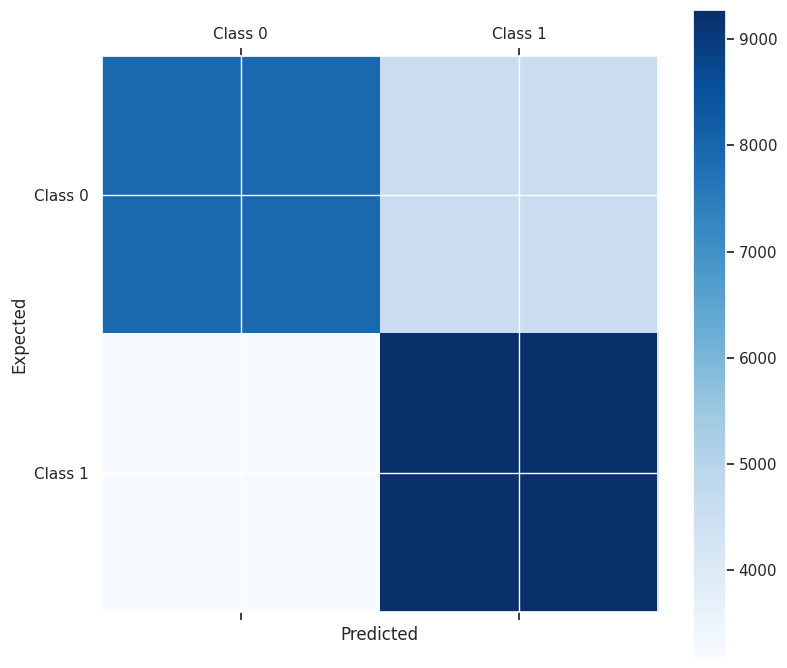

Accuracy 0.6901030183990059
              precision    recall  f1-score   support

           0       0.71      0.64      0.67     12498
           1       0.67      0.75      0.71     12449

    accuracy                           0.69     24947
   macro avg       0.69      0.69      0.69     24947
weighted avg       0.69      0.69      0.69     24947

AUC Score: 
0.6902108691153939


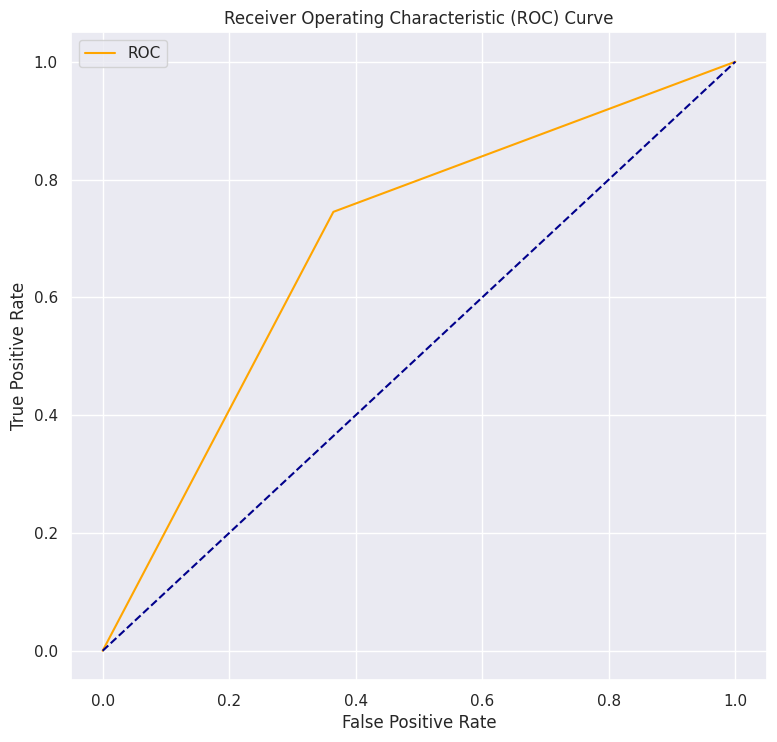

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = GaussianNB()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


classif_results()

#### Logistic Regression

Confusion matrix:
 [[11343  1155]
 [ 4026  8423]]


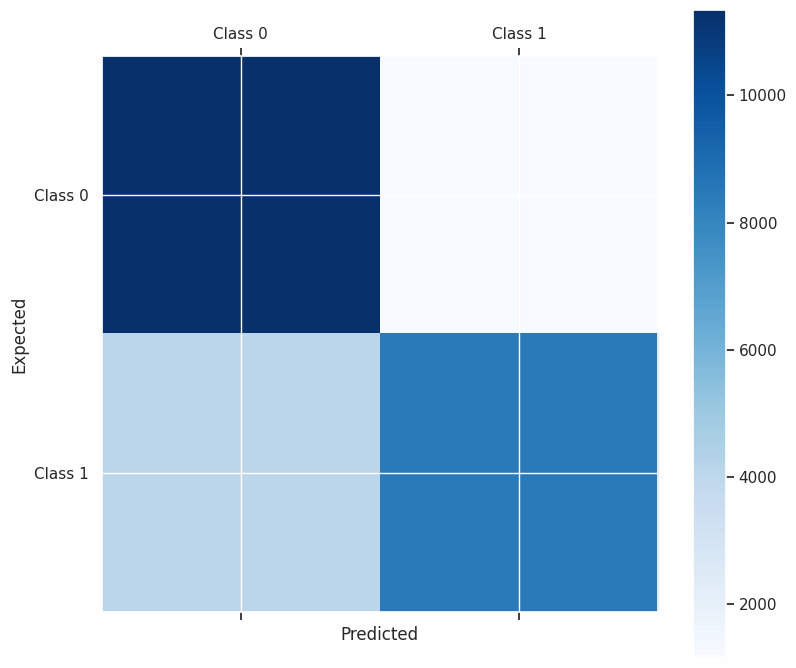

Accuracy 0.7923197178017397
              precision    recall  f1-score   support

           0       0.74      0.91      0.81     12498
           1       0.88      0.68      0.76     12449

    accuracy                           0.79     24947
   macro avg       0.81      0.79      0.79     24947
weighted avg       0.81      0.79      0.79     24947

AUC Score: 
0.7920928718986234


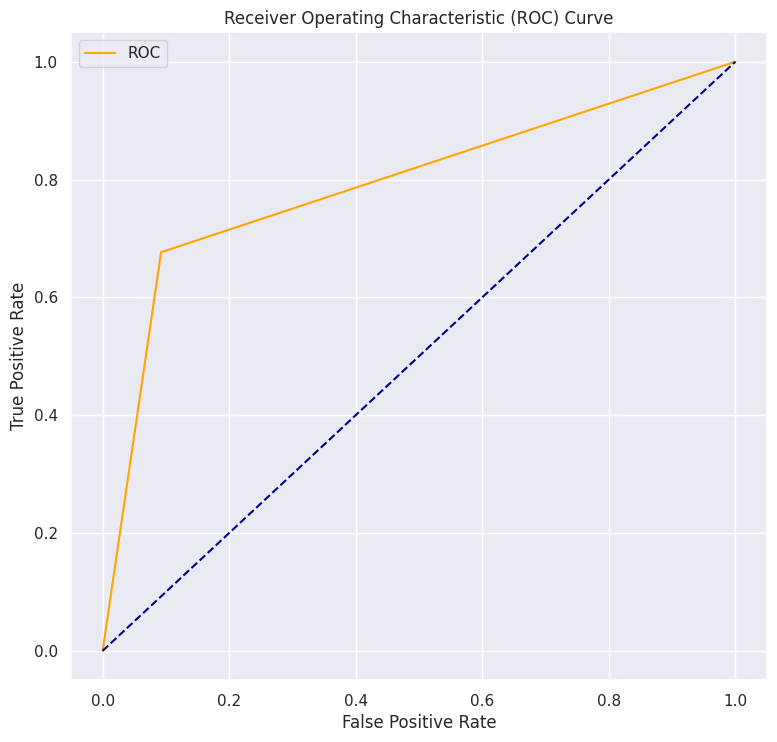

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


classif_results()

### KNN

Confusion matrix:
 [[10672  1826]
 [  357 12092]]


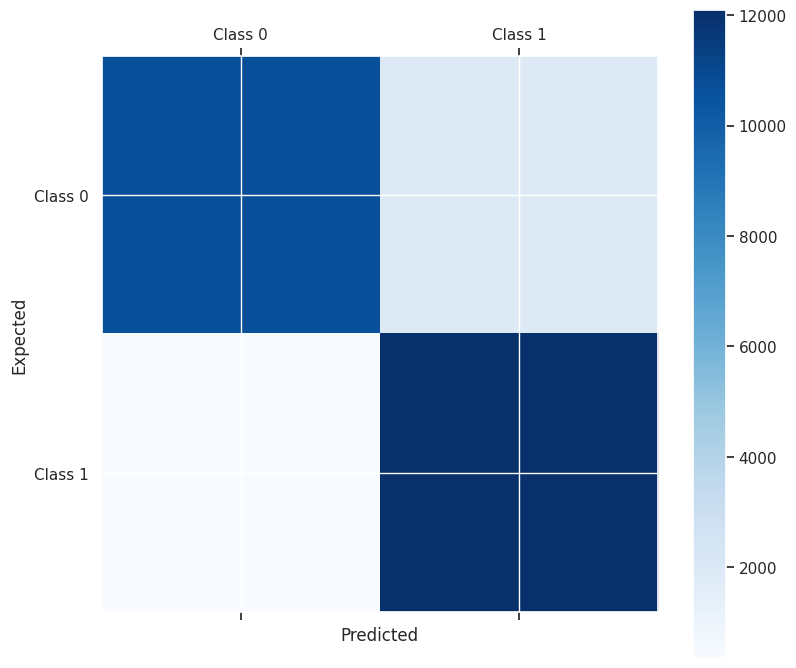

Accuracy 0.9124944883152283
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     12498
           1       0.87      0.97      0.92     12449

    accuracy                           0.91     24947
   macro avg       0.92      0.91      0.91     24947
weighted avg       0.92      0.91      0.91     24947

AUC Score: 
0.9126098106454523


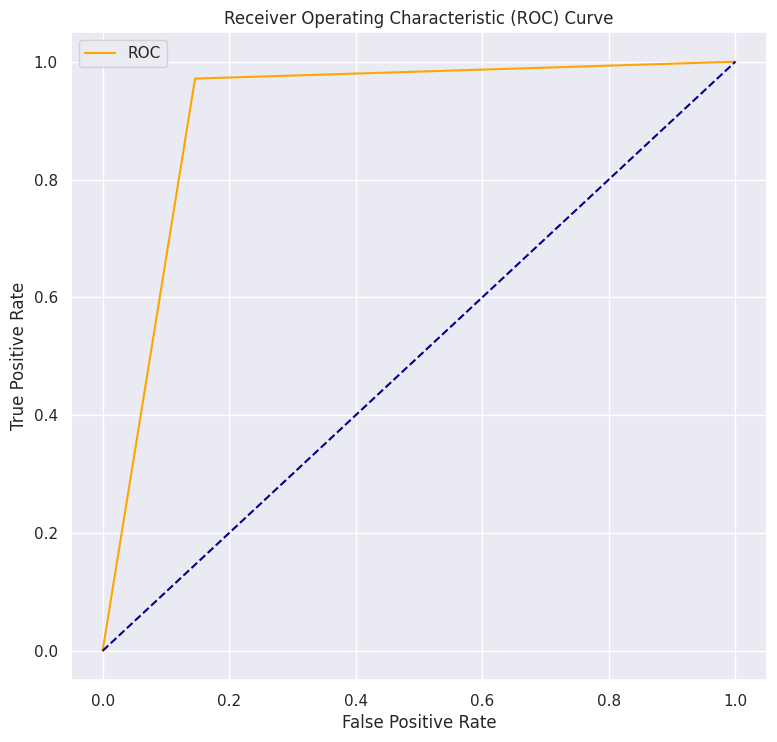

In [ ]:
classifier = KNeighborsClassifier()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


classif_results()

Minimum error:- 0.06141018960195615 at K = 0


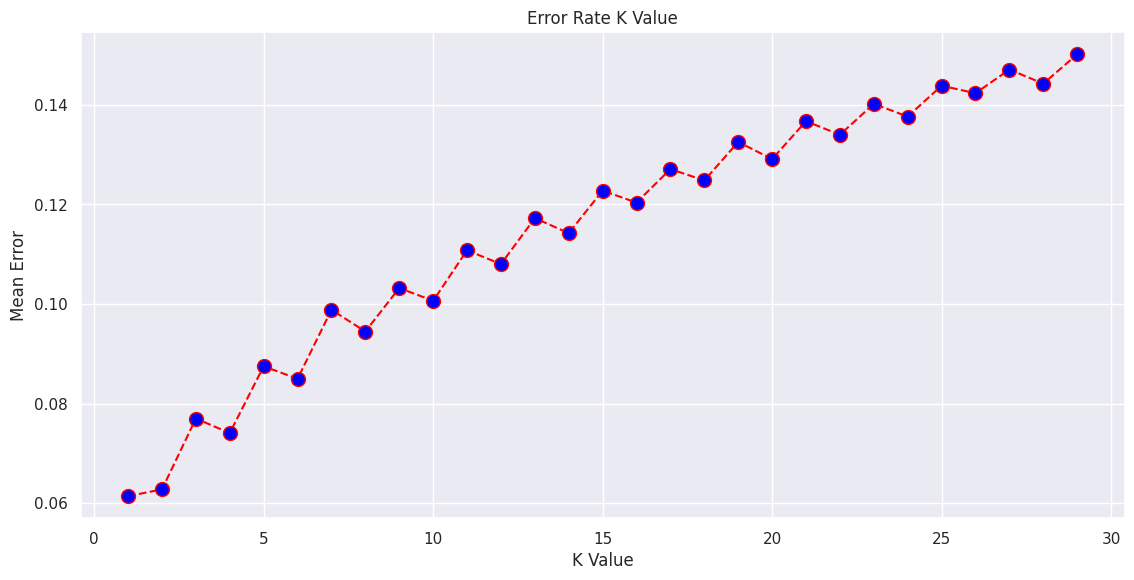

In [ ]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error)))

Here, we can check on how the mean error gets varied with respect to that of the number of neighbours. We can see that the best k value that corresponds to least error rate comes initially and gradually increases across the scale. This is because we have initaially done a synthesised oversampling of data so already data points are plotted based on feature grouping and thats why wehen we run KNN we would end up with least error at first and gradually error increases on increasing n.

###  Decision tree

Confusion matrix:
 [[11756   742]
 [  453 11996]]


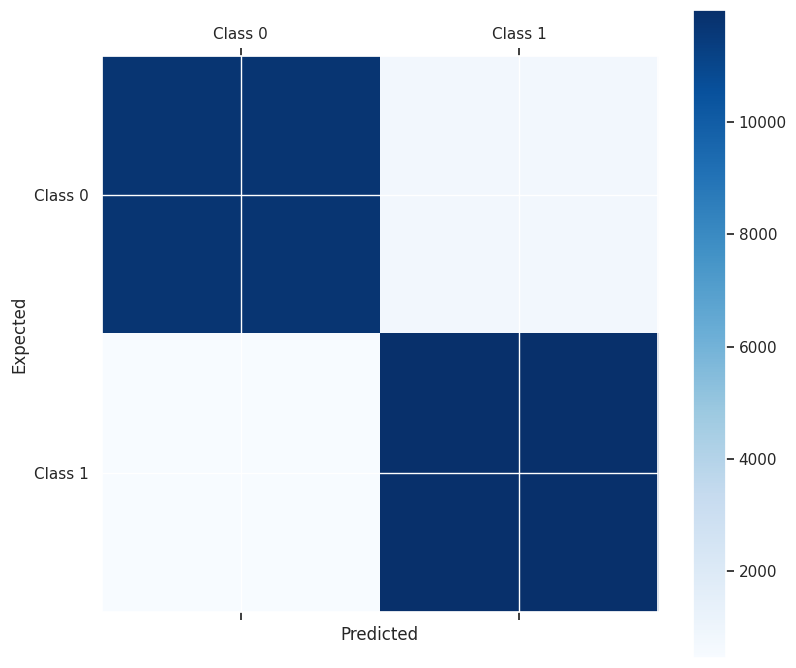

Accuracy 0.9520984487112679
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     12498
           1       0.94      0.96      0.95     12449

    accuracy                           0.95     24947
   macro avg       0.95      0.95      0.95     24947
weighted avg       0.95      0.95      0.95     24947

AUC Score: 
0.9521210179715989


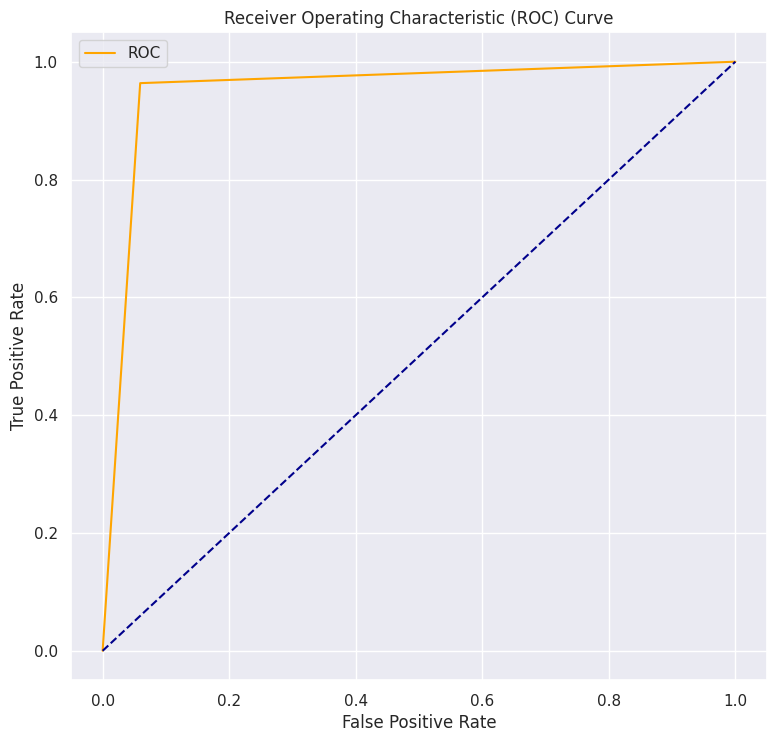

In [ ]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train,y_train)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


classif_results()

<Figure size 800x800 with 0 Axes>

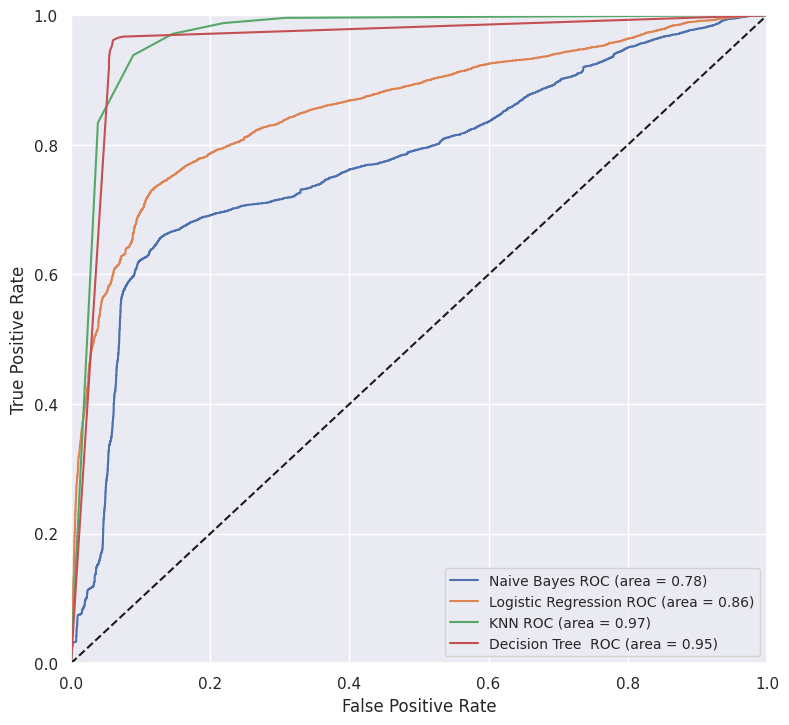

In [ ]:
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
des_model = tree.DecisionTreeClassifier()

models = [

    {
        'label': 'Naive Bayes',
        'model': nb_model
    },
    {
        'label': 'Logistic Regression',
        'model': lr_model
    },
      {
        'label': 'KNN',
        'model': knn_model
    },

    {
        'label': 'Decision Tree ',
        'model': des_model
    }
]

from sklearn.metrics import roc_curve, roc_auc_score, auc


plt.clf()
plt.figure(figsize=(8,8))
for m in models:
    m['model'].probability = True
    probas = m['model'].fit(X_train,y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

Decision Tree as well as KNN model seems to be working well for our data and has good classification ability over Naive Bayes and Logistic Regression.